<a href="https://colab.research.google.com/github/farahwadya/Resampling-data-time-series/blob/main/(Core)_Resampling_Datetime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import packages

In [ ]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/06-AdvancedML/Week21/Data/london_weather.csv'
df=pd.read_csv(fpath)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d', errors='coerce')
df = df.set_index('datetime')


In [ ]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df.describe().round(2)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341.00,15322.00,15341.00,15322.00,15335.00,15305.00,15339.00,15335.00,15337.00,13900.00
mean,19995671.59,5.27,4.35,118.76,15.39,11.48,7.56,1.67,101536.61,0.04
std,121217.56,2.07,4.03,88.90,6.55,5.73,5.33,3.74,1049.72,0.55
min,19790101.00,0.00,0.00,8.00,-6.20,-7.60,-11.80,0.00,95960.00,0.00
25%,19890702.00,4.00,0.50,41.00,10.50,7.00,3.50,0.00,100920.00,0.00
50%,20000101.00,6.00,3.50,95.00,15.00,11.40,7.80,0.00,101620.00,0.00
75%,20100702.00,7.00,7.20,186.00,20.30,16.00,11.80,1.60,102240.00,0.00
max,20201231.00,9.00,16.00,402.00,37.90,29.00,22.30,61.80,104820.00,22.00


In [ ]:
#Keep only data from the year 2000 or later.
df_fil=df[df.index.year >=2000].copy()
df_fil.head(5)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
2000-01-01,20000101,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,20000102,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,20000103,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,20000104,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,20000105,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [ ]:
df.index.min(), df.index.max()


(Timestamp('1979-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00'))

In [ ]:
#Keep only the following features: precipitation, mean_temp , min_temp, max_temp, snow_depth
df_fil=df_fil[['precipitation', 'mean_temp' , 'min_temp', 'max_temp', 'snow_depth']]
df_fil.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


#fill null values

In [ ]:
#Impute any missing values.
#Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!
# عدد القيم المفقودة
df_fil['precipitation'].isna().sum()

# نسبة القيم المفقودة
#.isna().mean() * 100


np.int64(6)

In [ ]:
df_fil['precipitation']=df_fil['precipitation'].interpolate() # I used interpolation for the precipitation column because missing rainfall values can vary gradually over time, so estimating them based on the surrounding days gives a realistic and smooth approximation of actual rainfall.
print(df_fil['precipitation'].isna().sum())


0


In [ ]:
df_fil['mean_temp']=df_fil['mean_temp'].interpolate() #i used the interpolate to keep the gradual change of the temp
print(df_fil['mean_temp'].isna().sum())


0


In [ ]:
df_fil['min_temp']=df_fil['min_temp'].interpolate()
print(df_fil['min_temp'].isna().sum())


0


In [ ]:
df_fil['max_temp']=df_fil['max_temp'].interpolate()
print(df_fil['max_temp'].isna().sum())


0


In [ ]:
#df_fil['snow_depth']=df_fil['snow_depth'].fillna(method='ffill')
df_fil['snow_depth']=df_fil['snow_depth'].ffill()  # snow depth usually depends on the previous days so i will fill with forword fill
print(df_fil['snow_depth'].isna().sum())


0


## part 2

### Q1

Q1: What month had the most precipitation between 2000 through 2010?
Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method

Find the date and corresponding value for the max precipitation.
Plot the feature and time period that corresponds to the question.

Make sure to meet the "Visualization Requirements" below!
Determine the date and value for the most precipitation (the max precipitation).

Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
Make sure to add a legend so that your label is visible.

In [ ]:
df_period=df_fil['2000':'2010']
month_precip = df_period['precipitation'].resample("ME").sum()
max_month=month_precip.idxmax()
max_precip = month_precip.max()
max_month
print(f'max precip was {max_precip} in {max_month}')
# Make sure to keep only months within 2000-2010


max precip was 155.4 in 2000-10-31 00:00:00


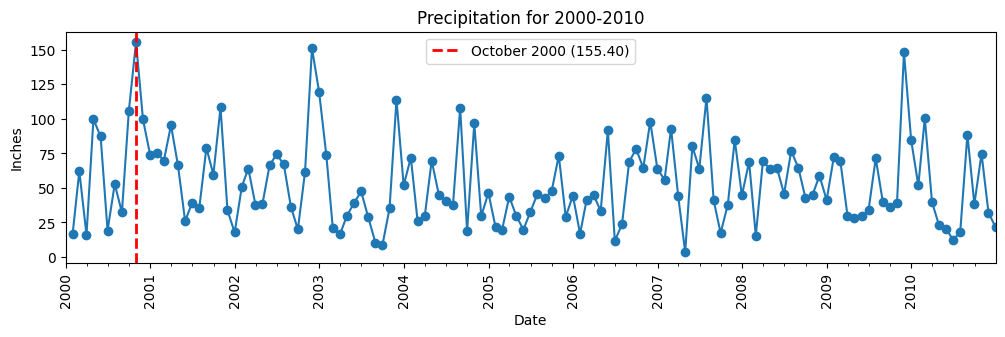

In [ ]:
import matplotlib.pyplot as plt

# Plot the monthly precipitation
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(month_precip.index, month_precip.values, marker='o', linestyle='-')
loc_3months = mdates.MonthLocator(interval=3)
# Add vertical line
ax.axvline(max_month, color='red', linestyle='--', lw=2,
           label=f'{max_month.strftime("%B %Y")} ({max_precip:.2f})')
ax.legend()
# Set axis labels and title
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
from matplotlib.ticker import NullFormatter
ax.xaxis.set_minor_formatter(NullFormatter())

ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2010-12-31'))

plt.xticks(rotation=90)

ax.set_ylabel('Inches')
ax.set_xlabel('Date')
ax.set_title('Precipitation for 2000-2010')
plt.show()


### Q2

Q2: Which year between 2000-2020 had the coolest average temperature?
Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.

Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!
Determine the year and value for the lowest mean temp.
Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.

In [ ]:
mean_temp_y=df_period['mean_temp'].resample('YE').mean()
coolest_yr= mean_temp_y.idxmin()
print(f'coolest_yr{coolest_yr}')
coolest_val = mean_temp_y.min()
coolest_val

coolest_yr2010-12-31 00:00:00


10.635890410958904

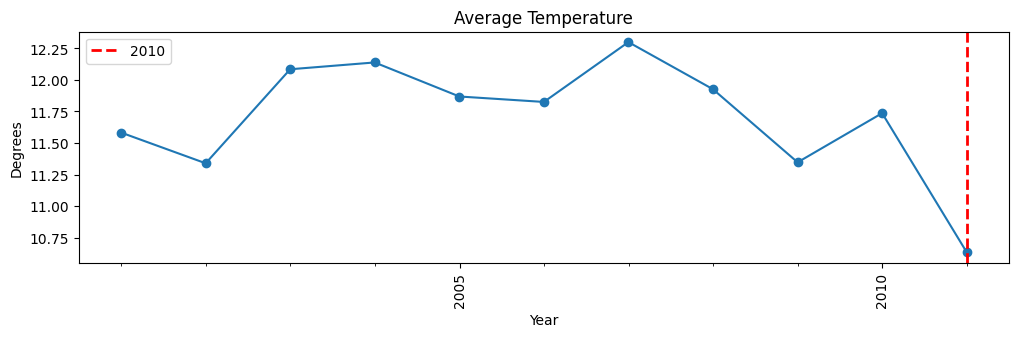

In [ ]:
from matplotlib.lines import lineStyles
fig,ax=plt.subplots(figsize=(12,3))
ax.plot(mean_temp_y.index,mean_temp_y.values,marker='o',linestyle='-')
ax.axvline(coolest_yr,color='red',linestyle='--',lw=2,label=f'{coolest_yr.year}')
ax.legend()
ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=90)
ax.set_xlabel('Year')
ax.set_ylabel('Degrees')
ax.set_title('Average Temperature')
ax.xaxis.set_minor_locator(mdates.YearLocator(base=1))
ax.xaxis.set_minor_formatter(mdates.DateFormatter(''))